In [1]:
import os
import shutil

import dendropy
from dendropy.interop import raxml

In [ ]:
#move down
ebov_2014_data = dendropy.DnaCharacterMatrix.get_from_path('trim_ebov_2014.fasta', 'fasta')
rx = raxml.RaxmlRunner()
ebov_tree = rx.estimate_tree(ebov_data, ['-m', 'GTRGAMMA', '-N', '10'])
ebov_tree.write_to_path('my_ebov_2014.nex', 'nexus')
del ebov_2014_data

all_data = dendropy.DnaCharacterMatrix.get_from_path('trim.fasta', 'fasta')
rx = raxml.RaxmlRunner()
all_tree = rx.estimate_tree(all_data, ['-m', 'GTRGAMMA', '-N', '10'])
all_tree.write_to_path('my_all.nex', 'nexus')
del all_data

In [2]:
ebov_data = dendropy.DnaCharacterMatrix.get_from_path('trim_ebov.fasta', 'fasta')

In [3]:
print(ebov_data.taxon_set)

TaxonSet(EBOV_2014_KM034549 18925 bp, EBOV_2014_KM034550 18925 bp, EBOV_2014_KM034554 18925 bp, EBOV_2014_KM034555 18925 bp, EBOV_2014_KM034556 18925 bp, EBOV_2014_KM034557 18925 bp, EBOV_2014_KM034560 18925 bp, EBOV_2014_KM034551 18925 bp, EBOV_2014_KM034552 18925 bp, EBOV_2014_KM034553 18925 bp, EBOV_2014_KM034558 18925 bp, EBOV_2014_KM034559 18925 bp, EBOV_2014_KM034561 18925 bp, EBOV_2014_KM034562 18925 bp, EBOV_2014_KM034563 18925 bp, EBOV_1976_AF272001 18925 bp, EBOV_1976_KC242801 18925 bp, EBOV_1995_KC242796 18925 bp, EBOV_1995_KC242799 18925 bp, EBOV_2007_KC242784 18925 bp, EBOV_2007_KC242785 18925 bp, EBOV_2007_KC242787 18925 bp, EBOV_2007_KC242786 18925 bp, EBOV_2007_KC242789 18925 bp, EBOV_2007_KC242788 18925 bp, EBOV_2007_KC242790 18925 bp)


In [4]:
rx = raxml.RaxmlRunner()
ebov_tree = rx.estimate_tree(ebov_data, ['-m', 'GTRGAMMA', '-N', '10'])
del ebov_data

Use raxml with AVX support (8 cpus)


IMPORTANT WARNING: Sequences T2 and T3 are exactly identical


IMPORTANT WARNING: Sequences T4 and T5 are exactly identical


IMPORTANT WARNING: Sequences T4 and T6 are exactly identical

IMPORTANT WARNING
Found 3 sequences that are exactly identical to other sequences in the alignment.
Normally they should be excluded from the analysis.

Just in case you might need it, an alignment file with 
sequence duplicates removed is printed to file /tmp/tmpOeibmz/dendropy_raxml.seqs.reduced


Using BFGS method to optimize GTR rate parameters, to disable this specify "--no-bfgs" 


This is the RAxML Master Pthread

This is RAxML Worker Pthread Number: 2

This is RAxML Worker Pthread Number: 4

This is RAxML Worker Pthread Number: 1

This is RAxML Worker Pthread Number: 3

This is RAxML Worker Pthread Number: 5

This is RAxML Worker Pthread Number: 6

This is RAxML Worker Pthread Number: 7


This is RAxML version 8.1.1 released by Alexandros Stamatakis on Jul

[RAxML run failed]:

raxmlHPC -m GTRCAT -s /tmp/tmpOeibmz/dendropy_raxml.seqs -n dendropy_raxml -p 621663841346659286 -m GTRGAMMA -N 10

raxmlHPC-PTHREADS-AVX: models.c:3551: initGeneric: Assertion `ext_EIGN[(l - 1)] > 0.0' failed.
Aborted (core dumped)


SystemExit: 134

To exit: use 'exit', 'quit', or Ctrl-D.


In [ ]:
ebov_tree.write_to_path('my_ebov.nex', 'nexus')
print(ebov_tree)

In [8]:
ebola_data = dendropy.DnaCharacterMatrix.get_from_path('trim.fasta', 'fasta')
print(ebola_data.taxon_set)

TaxonSet(BDBV_2007_FJ217161, BDBV_2012_KC545393, BDBV_2012_KC545395, BDBV_2012_KC545394, BDBV_2012_KC545396, TAFV_1994_FJ217162, EBOV_1976_KC242801, EBOV_1976_NC002549, EBOV_1977_KC242791, EBOV_1994_KC242792, EBOV_1996_KC242793, EBOV_1996_KC242794, EBOV_1995_AY354458, EBOV_1995_JQ352763, EBOV_1995_KC242796, EBOV_1995_KC242799, EBOV_2007_HQ613403, EBOV_2007_KC242784, EBOV_2007_KC242786, EBOV_2007_KC242787, EBOV_2007_KC242789, EBOV_2007_KC242785, EBOV_2007_KC242790, EBOV_2007_KC242788, EBOV_2008_HQ613402, EBOV_2002_KC242800, EBOV_2014_EM095, EBOV_2014_G3676, EBOV_2014_G3680, EBOV_2014_G3686, EBOV_2014_G3687, EBOV_2014_G3683, EBOV_2014_EM096, EBOV_2014_EM098, EBOV_2014_EM104, EBOV_2014_EM106, EBOV_2014_EM112, EBOV_2014_EM113, EBOV_2014_EM124, EBOV_2014_G3677, EBOV_2014_G3682, EBOV_2014_G3707, EBOV_2014_G3713, EBOV_2014_G3724, EBOV_2014_G3734, EBOV_2014_G3735, EBOV_2014_G3750, EBOV_2014_G3758, EBOV_2014_G3764, EBOV_2014_G3769, EBOV_2014_G3782, EBOV_2014_G3786, EBOV_2014_G3788, EBOV_2014_G3

In [9]:
rx = raxml.RaxmlRunner()
print(ebola_data)
ebola_tree = rx.estimate_tree(ebola_data, ['-m', 'GTRGAMMA', '-N', '1'])
print(rx.working_dir_path)  # talk about this
print(ebola_tree)

d140093015416592
/tmp/tmpJ1EuMt
(('BDBV_2012_KC545396':0.000104158501941,('BDBV_2012_KC545393':0.000103492517024,('BDBV_2012_KC545395':0.00010349898133,'BDBV_2012_KC545394':0.000155276051361):2.24731571224e-06):0.000154637994212):0.00539692642941,('TAFV_1994_FJ217162':0.401660901705,(((('EBOV_1995_AY354458':6.12622183043e-05,'EBOV_1995_JQ352763':2.24731571224e-06):0.000245816104557,('EBOV_1995_KC242799':2.24731571224e-06,'EBOV_1995_KC242796':5.10825428285e-05):0.000152935263091):0.00161115080697,(('EBOV_1996_KC242794':0.0021453907753,('EBOV_1994_KC242792':0.000767799810754,'EBOV_1996_KC242793':0.00102489758814):0.000624242704886):0.00432182185412,(('EBOV_2002_KC242800':0.0123587508649,((((('EBOV_2014_EM095':2.24731571224e-06,(((((('EBOV_2014_G3786':2.24731571224e-06,('EBOV_2014_G3808':2.24731571224e-06,((('EBOV_2014_G3841':2.24731571224e-06,'EBOV_2014_G3795':2.24731571224e-06):2.24731571224e-06,(('EBOV_2014_G3682':2.24731571224e-06,('EBOV_2014_G3677':2.24731571224e-06,'EBOV_2014_G3800'

In [10]:
ebola_tree.write_to_path('my_ebola.nex', 'nexus')

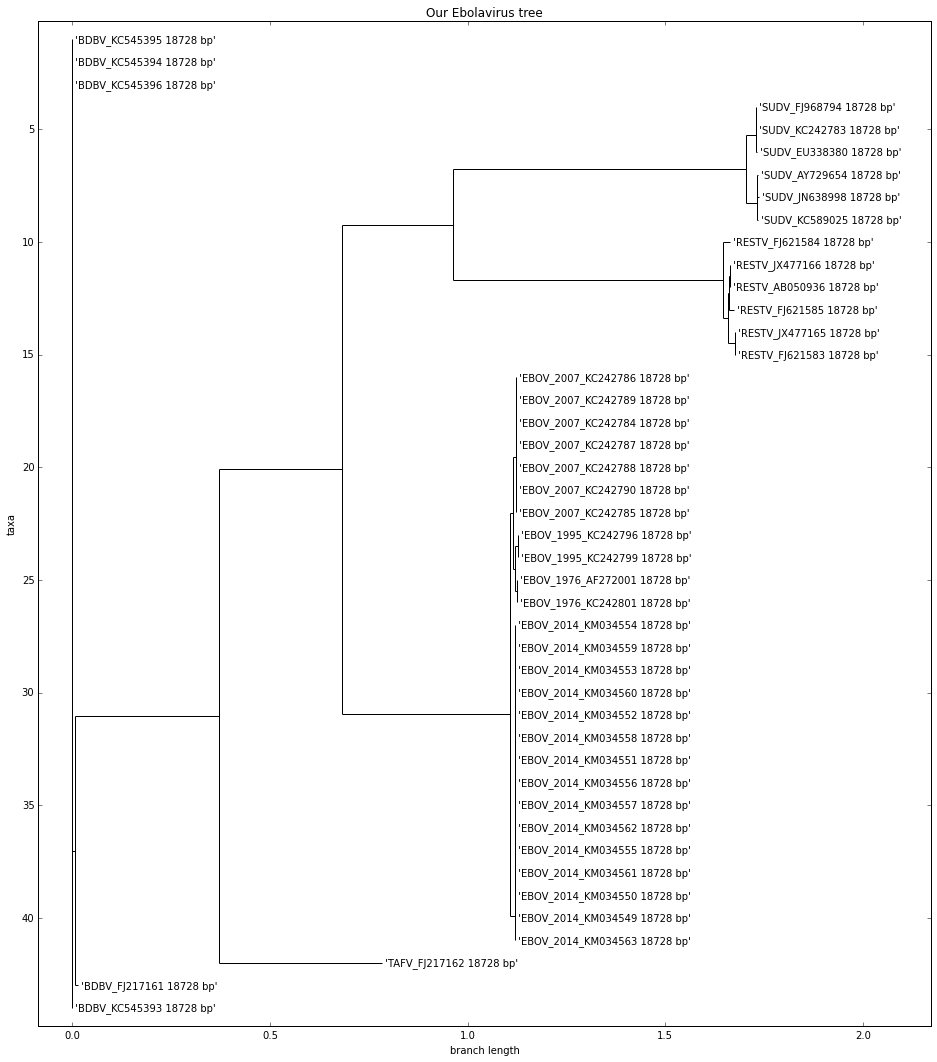

In [1]:
import matplotlib.pyplot as plt
from Bio import Phylo
%matplotlib inline
my_ebola_tree = Phylo.read('my_all.nex', 'nexus')
my_ebola_tree.name = 'Our Ebolavirus tree'

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(1, 1, 1)
Phylo.draw(my_ebola_tree, axes=ax)

## RAxML with Biopython

In [15]:
import random
import sys
from Bio.Phylo.Applications import RaxmlCommandline
raxml_cline = RaxmlCommandline(sequences='trim_ebov.fasta',
                               model='GTRGAMMA', name='biopython',
                               num_replicates='10',
                               parsimony_seed=random.randint(0, sys.maxint),
                               working_dir=os.getcwd() + os.sep + 'bp_rx')
print(raxml_cline)
try:
    os.mkdir('bp_rx')
except OSError:
    shutil.rmtree('bp_rx')
    os.mkdir('bp_rx')
out, err = raxml_cline()

raxmlHPC -m GTRGAMMA -n biopython -p 10000 -s alignments/ebov.pruned.phy -w /home/tra/bioinf-python/notebooks/05_Phylo/bp_rx -N 10


('Warning, you specified a working directory via "-w"\nKeep in mind that RAxML only accepts absolute path names, not relative ones!\n\n\nIMPORTANT WARNING: Sequences EBOV_2014_EM112 and EBOV_2014_EM113 are exactly identical\n\n\nIMPORTANT WARNING: Sequences EBOV_2014_EM112 and EBOV_2014_EM124 are exactly identical\n\n\nIMPORTANT WARNING: Sequences EBOV_2014_EM112 and EBOV_2014_G3707 are exactly identical\n\n\nIMPORTANT WARNING: Sequences EBOV_2014_EM112 and EBOV_2014_G3735 are exactly identical\n\n\nIMPORTANT WARNING: Sequences EBOV_2014_EM112 and EBOV_2014_G3764 are exactly identical\n\n\nIMPORTANT WARNING: Sequences EBOV_2014_EM112 and EBOV_2014_G3840 are exactly identical\n\n\nIMPORTANT WARNING: Sequences EBOV_2014_EM112 and EBOV_2014_NM042 are exactly identical\n\n\nIMPORTANT WARNING: Sequences EBOV_2014_G3677 and EBOV_2014_G3682 are exactly identical\n\n\nIMPORTANT WARNING: Sequences EBOV_2014_G3677 and EBOV_2014_G3758 are exactly identical\n\n\nIMPORTANT WARNING: Sequences EBOV_2

In [18]:
from Bio import Phylo
biopython_tree = Phylo.read('bp_rx/RAxML_bestTree.biopython', 'newick')

In [19]:
print(biopython_tree)

Tree(rooted=False, weight=1.0)
    Clade(branch_length=0.0)
        Clade(branch_length=5.2913172704e-05, name='EBOV_1976_NC002549')
        Clade(branch_length=2.21124977659e-06)
            Clade(branch_length=0.00455542576447)
                Clade(branch_length=0.00537216234227)
                    Clade(branch_length=0.000297157996979)
                        Clade(branch_length=0.00925042262638)
                            Clade(branch_length=5.29009157421e-05)
                                Clade(branch_length=0.000105897326917, name='EBOV_2007_KC242789')
                                Clade(branch_length=5.29209366122e-05, name='EBOV_2007_KC242786')
                            Clade(branch_length=2.21124977659e-06)
                                Clade(branch_length=2.21124977659e-06)
                                    Clade(branch_length=0.000533597939007, name='EBOV_2008_HQ613402')
                                    Clade(branch_length=5.29188816311e-05)
                 